### TALLER 2 - Matrices y Sistemas de Ecuaciones

María Alejandra Reyes Afanador - mareyesa@eafit.edu.co
, Jhon Jairo Hernandez Slait - jjhernans1@eafit.edu.co
 y Cristian Alberto López Chaverra - calopezc@eafit.edu.co

Algebra en Ciencia de los Datos

2023 - 2

### Problema 1

#### 1.

Un estudiante del curso de álgebra para ciencia de los datos debe hacer varios cálculos durante tres días en tres procesadores A B C. El primer día gasta 2, 4 y 5 horas en los procesadores A B C, respectivamente y por ello paga 220 dólares. El segundo día, las horas contratadas en cada procesador son 6, 9 y 8, respectivamente, y paga 490 dólares. El tercer día contrata 4.1, 5 y 3 horas, respectivamente en A B C y paga 274 dólares. ¿Cuál es el precio por hora en cada procesador?

In [1]:
import numpy as np

In [23]:
a = np.array([[2,4,5],[6,9,8],[4.1,5,3]])
b = np.array([[220],[490],[274]])
x_original = np.linalg.solve(a,b)
x_original

array([[40.],
       [10.],
       [20.]])

#### Resultado.
El precio por hora de cada procedador es; A = 40 USD, B = 10 US y C = 20 USD.


#### 2. 
El problema es que el estudiante comete un error y en lugar de 4.1 horas en el primer procesador del tercer día, pone 4.2 horas. El error es mínimo se podría pensar. Resuelva el sistema para ver como cambia el valor de la hora en cada procesador, antes y después del error. Explique si el cambio es grande o no y por qué se da este cambio. Consulte una cota superior para el error relativo en la solución de un sistema cuando hay un cambio en los coecientes de la matriz del sistema. Luego calcule una cota superior para el error relativo en el valor de la hora en los procesadores.


####  Solución.

Aplicaremos la función simpy by sym para en verificar si el sistema de ecuaciones tiene más de una soluación o si el problema afecta la única solución del sistema:

In [5]:
import sympy as sym
sym.init_printing()
x, y, z = sym.symbols('x, y, z')
f1 = sym.Eq(2*x+4*y+5*z,220)
f2 = sym.Eq(6*x+9*y+8*z,490)
f3 = sym.Eq(4.2*x+5*y+3*z,274)
x1 = sym.solve([f1,f2,f3],[x,y,z])
x1

In [22]:
#con numpy:
a_modificada = np.array([[2, 4, 5], [6,9,8],[4.2,5,3]])
b = np.array([220,490,274])

x_modificado= np.linalg.solve(a_modificada, b)
x_modificado

array([20.        , 31.53846154, 10.76923077])

Utilizar el delta para determinar el error relativo en A, en este caso, se usará la función con numpy y no sympy debido a que esta no tiene letras.

In [25]:
delta_a = np.linalg.norm(a_modificada - a, ord=np.inf) / np.linalg.norm(a, ord=np.inf)
print('El delta de a es:',delta_a)

El delta de a es: 0.004347826086956545


Calcular el numero de condición de a

In [26]:
kappa_a = np.linalg.cond(a, p=np.inf)
print('el numero de condición de a es:', kappa_a)

el numero de condición de a es: 766.0769230769235


Identificar cota superior.

In [27]:
error_cota_superior_x = kappa_a * delta_a
print('El error de la cota superior es:',error_cota_superior_x)

El error de la cota superior es: 3.330769230769251


#### Interpretación de resultados.
La variación delta en (A) de  0.0043 refleja una mínima perturbación en la matriz. No obstante, dado el alto número de condición de A de 766.08, el sistema es muy sensible a cambios, esto se puede evidenciar por la cota superior de 333.07%.

### Problema 2

#### 1.
Descargue un conjunto de datos y elija 4 variables numéricas según su interés. Calcule el vector de medias, la matriz de covarianzas y su inversa.

El dataset seleccionado permite analizar la relación entre la edad y salario de empleados con métricas financieras, evaluando productividad, eficiencia en ventas y ganancias. Además, estos datos demográficos y financieros ofrecen insights sobre rentabilidad, eficiencia y antigüedad en el mercado de la entidad.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df = pd.read_csv('Ejemplo_SalarioMultiple.csv')
df

,age,assets,profits,roa,sales,tenure,salary
0,49,10553.0,849.0,8.045106,13413.0,1,2468
1,58,14733.0,1390.0,9.434603,13406.0,5,6951
2,58,11538.0,98.0,0.849367,13223.0,6,2855
3,56,25199.0,452.0,1.793722,13195.0,5,2005
4,66,3008.1,190.0,6.316279,12848.6,19,5786
...,...,...,...,...,...,...,...
186,53,3068.7,198.6,6.471796,13617.5,17,641
187,61,5019.2,235.5,4.691983,13504.8,1,2076
188,61,21079.1,2474.3,11.738167,13462.7,12,15205
189,63,12659.8,1228.6,9.704735,13447.2,26,15413


In [36]:
df.dtypes

age          int64
assets     float64
profits    float64
roa        float64
sales      float64
tenure       int64
salary       int64
dtype: object

In [37]:
# Se eliminan columnas que no se requieren
df2 = df.drop(['age','tenure','salary'], axis = 1)
df2

,assets,profits,roa,sales
0,10553.0,849.0,8.045106,13413.0
1,14733.0,1390.0,9.434603,13406.0
2,11538.0,98.0,0.849367,13223.0
3,25199.0,452.0,1.793722,13195.0
4,3008.1,190.0,6.316279,12848.6
...,...,...,...,...
186,3068.7,198.6,6.471796,13617.5
187,5019.2,235.5,4.691983,13504.8
188,21079.1,2474.3,11.738167,13462.7
189,12659.8,1228.6,9.704735,13447.2


In [38]:
# Vector de medias
medias = df2.mean()
print("Vector de Medias:")
print(medias)
print()

Vector de Medias:
assets     48623.630890
profits     1258.132984
roa            4.959164
sales      20405.319895
dtype: float64



#### Cifras promedio en el conjunto de datos:

assets (Activos): 48623.63 unidades monetarias en activos.

profits (Ganancias): Alrededor de 1258.13 unidades monetarias en ganancias.

roa (Retorno sobre activos): En promedio, las ganancias representan aproximadamente el 4.96% de los activos totales.

sales (Ventas): Alrededor de 20405.32 unidades monetarias en ventas en promedio.

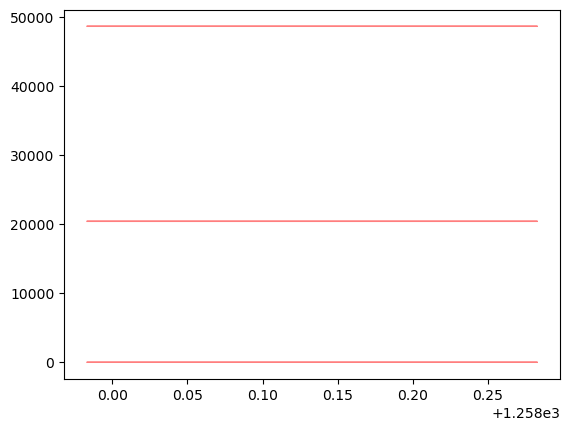

In [39]:
# Gráfica vectores de medias
mean_profits, mean_assets, mean_roa, mean_sales = medias['profits'], medias['assets'], medias['roa'], medias['sales']
plt.arrow(mean_profits, mean_assets, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5, label="Mean Vectors")
plt.arrow(mean_profits, mean_roa, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5)
plt.arrow(mean_profits, mean_sales, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5)
plt.show()

In [44]:
# Matriz de covarianzas
cov_matrix = np.cov(df2, rowvar=False)
print("Matriz de Covarianzas:")
print(cov_matrix)
print()

Matriz de Covarianzas:
[[ 8.59982034e+09  9.30692838e+07 -1.15926185e+05  9.18925280e+08]
 [ 9.30692838e+07  4.72915175e+06  4.02745985e+03  3.31185440e+07]
 [-1.15926185e+05  4.02745985e+03  3.69021640e+01  2.55438195e+03]
 [ 9.18925280e+08  3.31185440e+07  2.55438195e+03  4.68771268e+08]]



La matriz de covarianzas indica cómo las variables están relacionadas entre sí. En este dataset estas son las que presentan:

*Assets y profits presentan una covarianza positiva fuerte, indicando que la entidad entre más activos tiende a tener mayores ganancias.

*Profits y roa tienen una covarianza positiva, sugiriendo que las ganancias y el roa tienden a aumentar juntos.

*Assets y sales presentan una covarianza positiva fuerte, indicando que la entidad entre más activos tiende a realizar más ventas.

In [45]:
# Inversa de la matriz de covarianzas
invcov_matrix = np.linalg.inv(cov_matrix)
print("Inversa de la Matriz de Covarianzas:")
print(invcov_matrix)
print()

Inversa de la Matriz de Covarianzas:
[[ 1.79649920e-10 -3.68304620e-09  9.73056568e-07 -9.72612591e-11]
 [-3.68304620e-09  5.78489074e-07 -7.24037543e-05 -3.32557173e-08]
 [ 9.73056568e-07 -7.24037543e-05  3.78497790e-02  3.00158723e-06]
 [-9.72612591e-11 -3.32557173e-08  3.00158723e-06  4.65704643e-09]]



La inversa de la matriz de covarianzas proporciona información sobre la independencia relativa entre las variables:

*Entre proffit y roa los valores cercanos a cero tienen independencia relativa, indicando que las ganancias no dependen fuertemente del retorno sobre activos.

*Entre assets y sales los valores cercanos a cero tienen independencia, indicando que el tamaño de los activos no dicta fuertemente el volumen de ventas.

#### 2. 
Llame Z a la matriz de datos obtenida al restar la media de cada observación. ¿Cuál es la relación entre Z^tZ y la matriz de covarianza?

In [46]:
means_total = df2.mean()
Z = df2 - means_total
Zt = Z.T @ Z 
# se tiene que dividir por la len del df2 porque n-1 en una muestra y no una población
#Se asume que al realizar la muestra ya se uso un n
n = len(df2)
Zt_normalized = (Zt)/ (n-1)
print('esta es la primera opción: \n)', Zt_normalized)

Zt_n1 = Zt.apply(lambda value: value / (n-1), axis=1)
print('esta es la segunda opción: \n)', Zt_n1)


esta es la primera opción: 
)                assets       profits            roa         sales
assets   8.599820e+09  9.306928e+07 -115926.185114  9.189253e+08
profits  9.306928e+07  4.729152e+06    4027.459853  3.311854e+07
roa     -1.159262e+05  4.027460e+03      36.902164  2.554382e+03
sales    9.189253e+08  3.311854e+07    2554.381951  4.687713e+08
esta es la segunda opción: 
)                assets       profits            roa         sales
assets   8.599820e+09  9.306928e+07 -115926.185114  9.189253e+08
profits  9.306928e+07  4.729152e+06    4027.459853  3.311854e+07
roa     -1.159262e+05  4.027460e+03      36.902164  2.554382e+03
sales    9.189253e+08  3.311854e+07    2554.381951  4.687713e+08


In [47]:
# Mostrar ambas matrices para realizar la comparación

print('esta es la matriz de Zt: ', Zt_n1)
print('----')
print('esta es la matriz de covarianzas:\n', cov_matrix)

esta es la matriz de Zt:                 assets       profits            roa         sales
assets   8.599820e+09  9.306928e+07 -115926.185114  9.189253e+08
profits  9.306928e+07  4.729152e+06    4027.459853  3.311854e+07
roa     -1.159262e+05  4.027460e+03      36.902164  2.554382e+03
sales    9.189253e+08  3.311854e+07    2554.381951  4.687713e+08
----
esta es la matriz de covarianzas:
 [[ 8.59982034e+09  9.30692838e+07 -1.15926185e+05  9.18925280e+08]
 [ 9.30692838e+07  4.72915175e+06  4.02745985e+03  3.31185440e+07]
 [-1.15926185e+05  4.02745985e+03  3.69021640e+01  2.55438195e+03]
 [ 9.18925280e+08  3.31185440e+07  2.55438195e+03  4.68771268e+08]]


In [48]:
#notamos que las matrices son similares pero no exactas, por esto, obtamos por realizar una comparación entre ambas matrices

difference_matrix = cov_matrix - Zt_normalized
print("\nDiferencia entre las Matrices:")
print(difference_matrix)


Diferencia entre las Matrices:
           assets       profits           roa  sales
assets  -0.000002  0.000000e+00  0.000000e+00    0.0
profits  0.000000 -9.313226e-10 -4.547474e-13    0.0
roa      0.000000 -4.547474e-13  0.000000e+00    0.0
sales    0.000000  0.000000e+00  0.000000e+00    0.0


#### Interpretación de resultados

Se calculo Z^tZ y se normalizo para hacerlo comparable con la matriz de covarianzas. Esta normalización asegura que ambas matrices sean comparables en términos de dispersión y relaciones lineales entre variables. Es decir, estas son proporcionales cuando las observaciones están centradas en torno a su media, lo que facilita las comparaciones y análisis de datos.

#### 3. 
Calcule la distancia de Mahalanobis de cada observación respecto al vector de medias. Realice una gráfica de dispersión de variables dos a dos coloreando cada observación de acuerdo con la distancia calculada.

In [49]:
!pip install spicy

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

# Calcular la distancia de Mahalanobis para cada observación
mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, means_total, invcov_matrix), axis=1)

# Definir los colores basados en la distancia de Mahalanobis
colors = plt.cm.viridis(mahalanobis_dist / max(mahalanobis_dist))

# Se imprime la distancia de Mahalanobis para cada observación
print("Distancia de Mahalanobis de cada observación respecto al vector de medias:")
print(mahalanobis_dist)

Distancia de Mahalanobis de cada observación respecto al vector de medias:
0      0.642820
1      0.825920
2      0.875020
3      0.670174
4      0.659185
         ...   
186    0.682435
187    0.555729
188    1.373732
189    0.854686
190    0.844818
Length: 191, dtype: float64


La distancia de Mahalanobis mide qué tan lejos está una observación del centro de tus datos. Valores cercanos a 0 indican cercanía al centro, mientras que valores altos señalan atipicidad.

Al analizar estas distancias, se detectan empleados cuyas características financieras son atípicas, lo que puede indicar situaciones inusuales, errores en los datos o incluso oportunidades estratégicas.

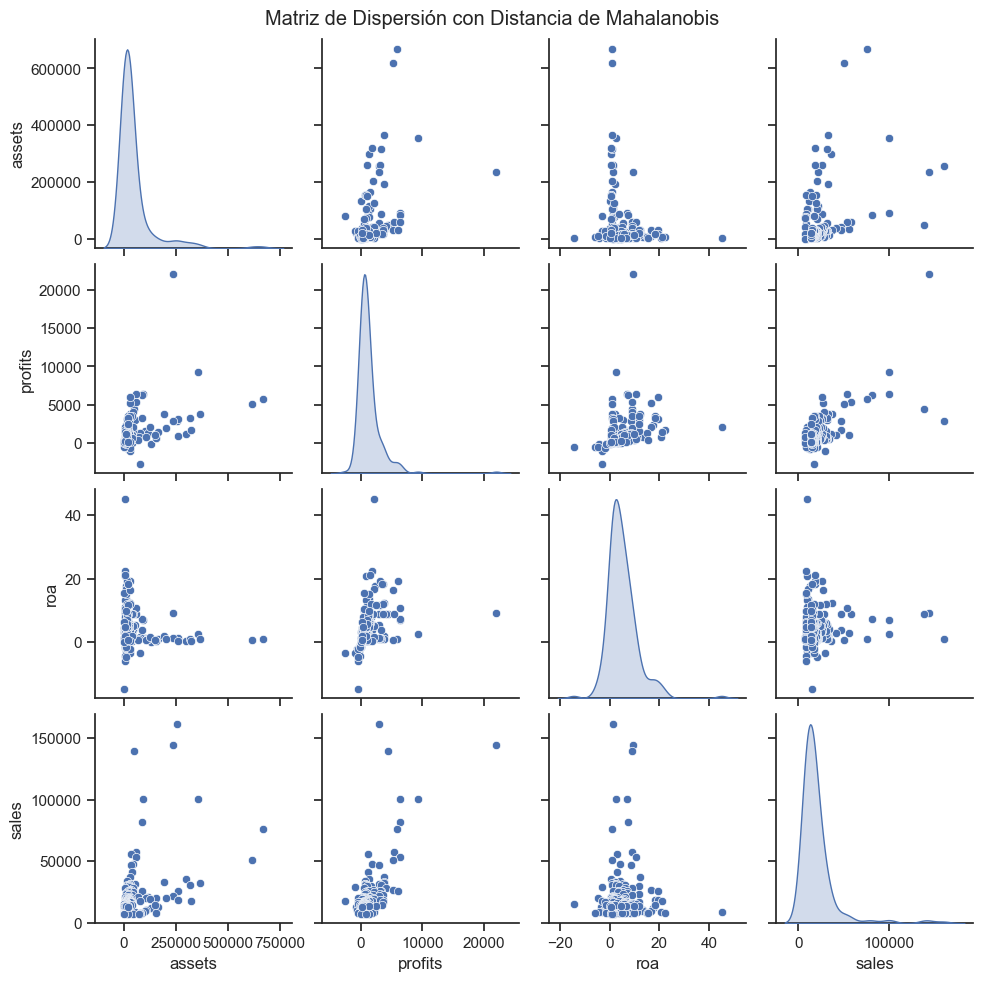

In [66]:
import warnings

# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

# Matriz de dispersión (scatter plot matrix) con las columnas específicas
sns.set(style="ticks")
sns.pairplot(df2, vars=['assets', 'profits', 'roa', 'sales'], palette=colors, diag_kind='kde', height=2.5)
plt.suptitle('Matriz de Dispersión con Distancia de Mahalanobis')
plt.subplots_adjust(top=0.95)
plt.show()

#### 4. 
Identifique la bola de radio 1 con centro en el vector de medias respecto a la distancia de Mahalanobis en la gráfica del punto anterior.

De la matriz anterior, seleccionamos profits vs assets y sales vs roa, para identificar la bola de radio 1 con centro en el vector de medias respecto a la distancia de Mahalanobis

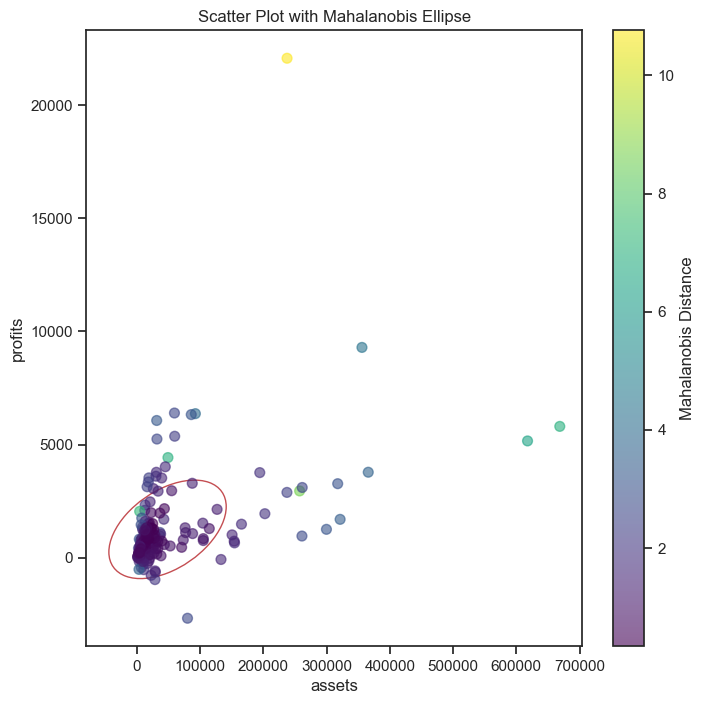

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.spatial import distance

# Calcula las medias
mean_vector = df2.mean(axis=0)

# Calcula la distancia de Mahalanobis para cada punto en el DataFrame
mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, mean_vector, invcov_matrix), axis=1)

# Selecciona dos variables para visualizar
selected_vars = df2[['assets', 'profits']]
selected_mean = selected_vars.mean(axis=0)
selected_cov = selected_vars.cov()

# Función para dibujar la elipse
def plot_mahalanobis_ellipse(mean, cov, ax):
    """Dibuja una elipse de Mahalanobis para una distancia de 1."""
    # Valores y vectores propios de la matriz de covarianza
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ángulo de rotación y ancho/alto de la elipse
    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Crear y dibujar la elipse
    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor='r', facecolor='none')
    ax.add_patch(ellipse)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar la elipse de Mahalanobis para una distancia de 1
plot_mahalanobis_ellipse(selected_mean, selected_cov, ax)

# Agregar los puntos coloreados basados en la distancia de Mahalanobis
scatter = ax.scatter(selected_vars.iloc[:, 0], selected_vars.iloc[:, 1], c=mahalanobis_dist, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Mahalanobis Distance')

# Configuración adicional del gráfico
ax.set_title('Scatter Plot with Mahalanobis Ellipse')
ax.set_xlabel(selected_vars.columns[0])
ax.set_ylabel(selected_vars.columns[1])

# Mostrar el gráfico
plt.show()

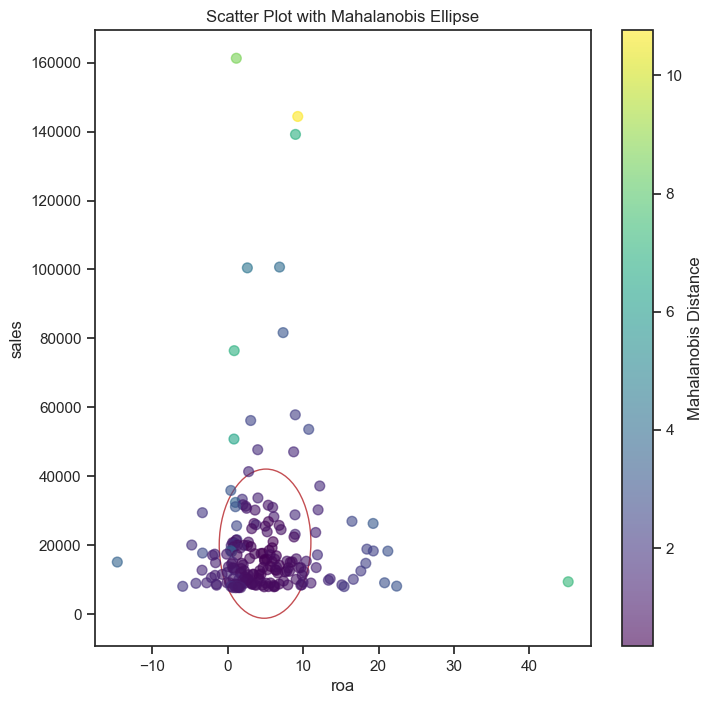

In [71]:
# Calcula las medias
mean_vector = df2.mean(axis=0)

# Calcula la distancia de Mahalanobis para cada punto en el DataFrame
mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, mean_vector, invcov_matrix), axis=1)

# Selecciona dos variables para visualizar
selected_vars = df2[['roa', 'sales']]
selected_mean = selected_vars.mean(axis=0)
selected_cov = selected_vars.cov()

# Función para dibujar la elipse
def plot_mahalanobis_ellipse(mean, cov, ax):
    """Dibuja una elipse de Mahalanobis para una distancia de 1."""
    # Valores y vectores propios de la matriz de covarianza
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ángulo de rotación y ancho/alto de la elipse
    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Crear y dibujar la elipse
    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor='r', facecolor='none')
    ax.add_patch(ellipse)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar la elipse de Mahalanobis para una distancia de 1
plot_mahalanobis_ellipse(selected_mean, selected_cov, ax)

# Agregar los puntos coloreados basados en la distancia de Mahalanobis
scatter = ax.scatter(selected_vars.iloc[:, 0], selected_vars.iloc[:, 1], c=mahalanobis_dist, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Mahalanobis Distance')

# Configuración adicional del gráfico
ax.set_title('Scatter Plot with Mahalanobis Ellipse')
ax.set_xlabel(selected_vars.columns[0])
ax.set_ylabel(selected_vars.columns[1])

# Mostrar el gráfico
plt.show()

#### Interpretación resultado.
Con lo anteriror, se identifica la bola de radio 1 con centro en el vector de medias a través de la distancia de Mahalanobis, definiendo y observando visualmente la región donde las observaciones son consideradas típicas, por ende lo que está muy alejado es inusual o atípico.

### Problema 3

Implemente el algoritmo de substitución hacia adelante para encontrar la solución al sistema lineal Lx = b, donde L es una matriz triangular inferior. En caso de infinitas soluciones, el algoritmo debe retornar una solución particular y una base para el espacio nulo de L.

#### Solución.

Como se abordo el ejercicio cuando el vector tiene una unica solución esto se hace saber en el mensaje que se imprime y se muestra el resultado, sin embargo, cuando el vector tiene infinitas soluciones se selecciona la particular/mejor, además se muestran 5 posibles aleatorias.

Para que esto se pueda apreciar de una mejor forma se plantaron estos 2 ejemplos de matrices:


In [111]:
# EJEMPLO 1 Con única solución
import numpy as np

def sustitucion_hacia_adelante(L, b):
    n = len(b)
    x = np.zeros(n)  # Inicializar el vector de solución
    
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    
    return x

def encontrar_soluciones(L, b):
    # Sustitución hacia adelante
    solucion = sustitucion_hacia_adelante(L, b)
    
    # Verificar si hay otras soluciones posibles
    otras_soluciones = np.linalg.lstsq(L, b, rcond=None)[0]
    
    # Verificar si hay infinitas soluciones
    if np.any(np.isnan(solucion)):
        print("El sistema tiene infinitas soluciones.")
        # Calcular y mostrar cinco posibles soluciones aleatorias
        print("La mejor solución encontrada es:")
        print(solucion)
        print("Otras soluciones posibles:")
        for _ in range(5):
            random_coef = np.random.rand(len(L))  # Coeficientes aleatorios para las soluciones
            solucion_infinita = np.dot(L, random_coef)
            print(solucion_infinita)
    else:
        # Verificar si la solución es única
        if np.allclose(otras_soluciones, solucion):
            print("La solución encontrada es única y la mejor posible.")
            print("Solución particular del sistema Lx = b:")
            print(solucion)
        else:
            print("El sistema tiene múltiples soluciones, pero la encontrada es la mejor.")
            print("La mejor solución encontrada es:")
            print(solucion)
            print("Muestra de 5 posibles soluciones aleatorias:")
            for _ in range(5):
                random_coef = np.random.rand(len(L))  # Coeficientes aleatorios para las soluciones
                solucion_aleatoria = np.dot(L, random_coef)
                print(solucion_aleatoria)

# Matriz triangular inferior L y el vector b
L = np.array([[1, 0, 0],
              [2, 1, 0],
              [3, 4, 1]])

b = np.array([1, 2, 3])

# Encontrar las soluciones y mostrar resultados
encontrar_soluciones(L, b)


La solución encontrada es única y la mejor posible.
Solución particular del sistema Lx = b:
[1. 0. 0.]


La mejor solución encontrada para el sistema de ecuaciones es x=[1. 0. 0.]. Esto significa que estos valores de x hacen que todas las ecuaciones del sistema sean aproximadamente iguales a b. 

In [112]:
# EJEMPLO 2 con infinitas soluciones
import numpy as np

def sustitucion_hacia_adelante(L, b):
    n = len(b)
    x = np.zeros(n)  # Inicializar el vector de solución
    
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    
    return x

def encontrar_soluciones(L, b):
    # Sustitución hacia adelante
    solucion = sustitucion_hacia_adelante(L, b)
    
    # Verificar si hay otras soluciones posibles
    otras_soluciones = np.linalg.lstsq(L, b, rcond=None)[0]
    
    # Verificar si hay infinitas soluciones
    if np.any(np.isnan(solucion)):
        print("El sistema tiene infinitas soluciones.")
        # Calcular y mostrar cinco posibles soluciones aleatorias
        print("La mejor solución encontrada es:")
        print(solucion)
        print("Otras soluciones posibles:")
        for _ in range(5):
            random_coef = np.random.rand(len(L))  # Coeficientes aleatorios para las soluciones
            solucion_infinita = np.dot(L, random_coef)
            print(solucion_infinita)
    else:
        # Verificar si la solución es única
        if np.allclose(otras_soluciones, solucion):
            print("La solución encontrada es única y la mejor posible.")
            print("Solución particular del sistema Lx = b:")
            print(solucion)
        else:
            print("El sistema tiene múltiples soluciones, pero la encontrada es la mejor.")
            print("La mejor solución encontrada es:")
            print(solucion)
            print("Muestra de 5 posibles soluciones aleatorias:")
            for _ in range(5):
                random_coef = np.random.rand(len(L))  # Coeficientes aleatorios para las soluciones
                solucion_aleatoria = np.dot(L, random_coef)
                print(solucion_aleatoria)

# Matriz triangular inferior L y el vector b
L = np.array([[1, 2, 4],
              [5, 9, 3],
              [3, 7, 6]])

b = np.array([3, 2, 1])

# Encontrar las soluciones y mostrar resultados
encontrar_soluciones(L, b)


El sistema tiene múltiples soluciones, pero la encontrada es la mejor.
La mejor solución encontrada es:
[ 3.         -1.44444444  0.35185185]
Muestra de 5 posibles soluciones aleatorias:
[2.59712828 6.62347299 5.75932163]
[3.27315461 8.56927669 7.67674395]
[ 5.05677762 10.29586081 10.41627429]
[3.15672989 3.64933914 5.18925274]
[1.72965348 4.06460103 3.87260746]


La mejor solución encontrada para el sistema de ecuaciones es x=[3,−1.44444444,0.35185185]. Esto significa que estos valores de x hacen que todas las ecuaciones del sistema sean aproximadamente iguales a b.
Además, de la mejor solución encontrada, se generaron cinco posibles soluciones aleatorias. Estos son vectores x generados al azar que aún cumplen aproximadamente con las ecuaciones del sistema Lx=b, pero no son los que más se aproximan para ser igual a b.

### Problema 4

#### 1.
Sea Hn(i, j) = 1 , llamada la matriz de Hilbert. Simule 1000 datos i+j −1
normales con matriz de covarianza Hn. Estime la matriz de covarianzas desde los datos simulados. Realice una gráca de n en el eje x con el número condición de la matriz de covarianza estimada en el eje y. Recuerde que el número de condición es ∥A∥∥A−1∥. 3⁄4Que tipo de comportamiento observa?

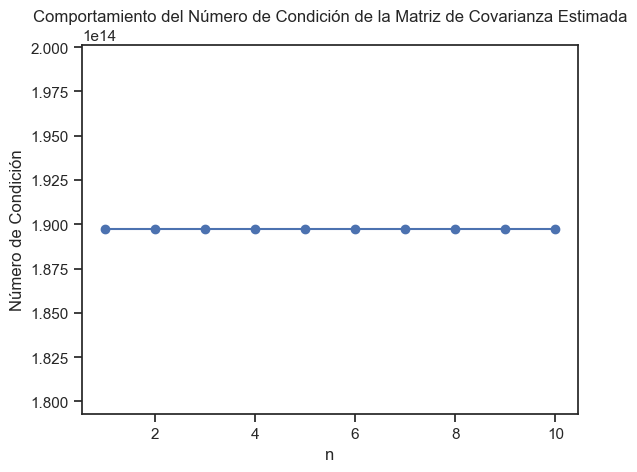

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el número de condición de una matriz
def calcular_numero_condicion(matriz):
    norma_matriz = np.linalg.norm(matriz)
    norma_inversa = np.linalg.norm(np.linalg.inv(matriz))
    return norma_matriz * norma_inversa

# Tamaño de la matriz de Hilbert
n = 10  # Puedes ajustar el tamaño de la matriz

# Generar la matriz de Hilbert
matriz_hilbert = np.array([[1 / (i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])

# Simular 1000 datos normales con media i+j-1 y matriz de covarianza Hn
np.random.seed(0)
datos_simulados = [np.random.multivariate_normal(mean=[i+j-1 for i in range(1, n+1)], cov=matriz_hilbert, size=1000) for j in range(1, n+1)]

# Estimar la matriz de covarianza desde los datos simulados
matriz_covarianza_estimada = np.cov(np.concatenate(datos_simulados, axis=1), rowvar=False)

# Calcular el número de condición de la matriz de covarianza estimada
numero_condicion = calcular_numero_condicion(matriz_covarianza_estimada)

# Graficar n vs número de condición
plt.plot(range(1, n+1), [numero_condicion] * n, marker='o', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel('Número de Condición')
plt.title('Comportamiento del Número de Condición de la Matriz de Covarianza Estimada')
plt.show()

En la gráfica se observa que la precisión de la estimación de la matriz de covarianza es consistente, independientemente del número de variables de los datos (en este caso 1.000). El número de condición estable es deseable, por lo que garantiza que las estimaciones de varianza y covarianza sean confiables y no estén distorsionadas por la variabilidad de los datos o el tamaño de la muestra.

#### 2
Considere x = [123456789101112131415]. Defina b = H15x y resuelva numéricamente el sistema con la forma x = H −1 b. ¿Qué conclusión obtiene? Busque alternativas para resolver el problema observado.

In [77]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
H_15 = np.linalg.inv(np.array([[1/(i+j+1) for i in range(15)] for j in range(15)]))
b = np.dot(H_15, x)

In [78]:
#x usando la inversa de H15
x_calculado = np.dot(np.linalg.inv(H_15), b)

In [79]:
print("Vector original x:", x)
print("Vector calculado x:", x_calculado)

Vector original x: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Vector calculado x: [-3635.62797358   -54.41990676     6.31813027     9.74176388
    11.02882409    11.98658179    12.85277053    13.69085329
    14.5207563     15.35017884    16.18278974    17.02054163
    17.86447293    18.71507502    19.5725021 ]


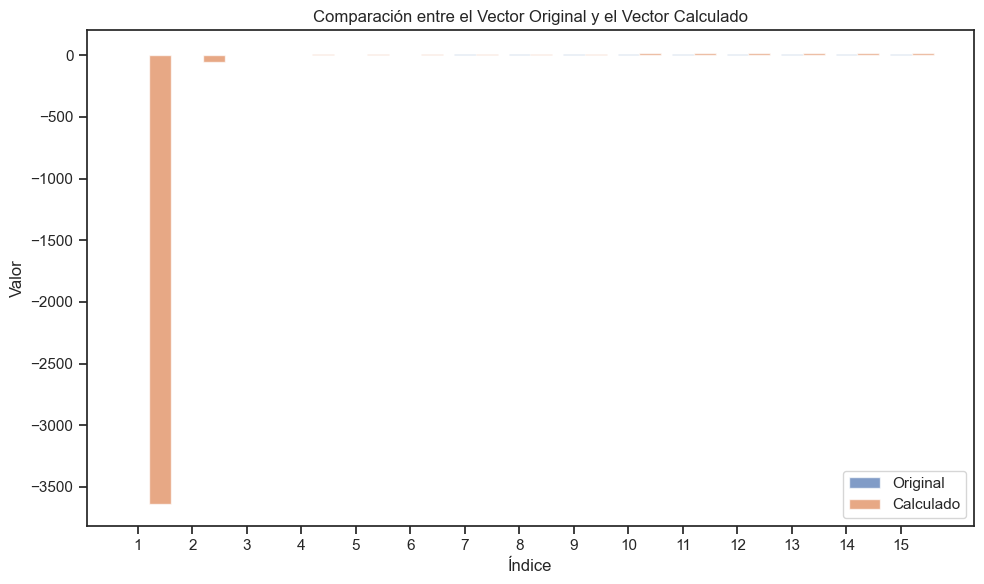

In [80]:
import matplotlib.pyplot as plt

# Vector original y vector calculado
x_original = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
x_calculado = np.array([-3635.62797358, -54.42, 6.32, 9.74, 11.03, 11.99, 12.85, 13.69, 14.52, 15.35, 16.18, 17.02, 17.86, 18.72, 19.57])

# Crear un gráfico de barras para comparar los valores
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_original)), x_original, width=0.4, label='Original', align='center', alpha=0.7)
plt.bar(np.arange(len(x_calculado)) + 0.4, x_calculado, width=0.4, label='Calculado', align='center', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre el Vector Original y el Vector Calculado')
plt.legend()
plt.xticks(range(len(x_original)), range(1, len(x_original) + 1))
plt.tight_layout()
plt.show()

Se resolvió el sistema de ecuaciones utilizando la inversa de la matriz de covarianza Hilbert. Sin embargo, esta técnica puede ser susceptible a problemas de estabilidad numérica, lo que resulta en una solución menos precisa y esto se observa en lo alejados que estan los 2 primeros valores de x calculado respecto al original.

#### Solución alternativa 1

In [82]:
import numpy as np

# Definir el vector original x
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Definir la matriz de covarianza Hilbert de tamaño 15
H15 = np.array([[1 / (i + j - 1) for j in range(1, 16)] for i in range(1, 16)])

# Calcular el lado derecho de la ecuación Lx = b
b = np.dot(H15, x)

# Resolver el sistema de ecuaciones lineales
x_solved = np.linalg.solve(H15, b)

# Imprimir el vector original x y el vector calculado x_solved
print("Vector original x:")
print(x)
print("Vector calculado x:")
print(x_solved)

Vector original x:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Vector calculado x:
[  0.99999985   2.00002111   2.99931817   4.00860907   4.95591203
   5.98144455   8.4198371   -0.29718661  35.18983673 -42.59875652
  81.27212584 -50.43731914  48.52658784   2.26774053  16.71182942]


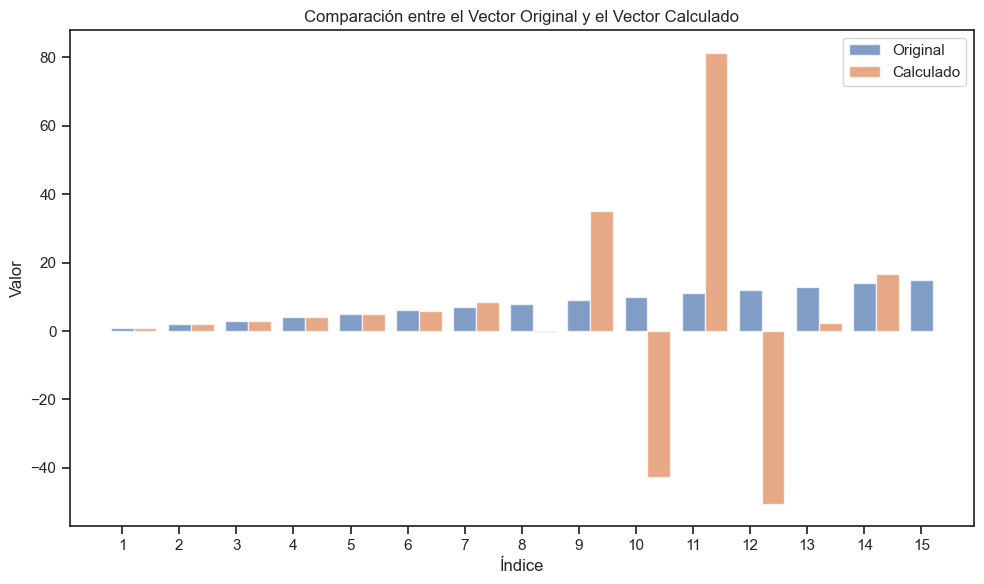

In [83]:
import matplotlib.pyplot as plt

# Vector original y vector calculado
x_original = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
x_calculado = np.array([0.99999985, 2.00002111 , 2.99931817, 4.00860907, 4.95591203, 5.98144455, 8.4198371, -0.29718661, 35.18983673, -42.59875652, 81.27212584, -50.43731914, 2.26774053, 16.71182942])

# Crear un gráfico de barras para comparar los valores
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_original)), x_original, width=0.4, label='Original', align='center', alpha=0.7)
plt.bar(np.arange(len(x_calculado)) + 0.4, x_calculado, width=0.4, label='Calculado', align='center', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre el Vector Original y el Vector Calculado')
plt.legend()
plt.xticks(range(len(x_original)), range(1, len(x_original) + 1))
plt.tight_layout()
plt.show()

#### Solución alternativa 2

In [84]:
import numpy as np
from scipy.linalg import solve

# Definir el vector original x
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Definir la matriz de covarianza Hilbert de tamaño 15
H15 = np.array([[1 / (i + j - 1) for j in range(1, 16)] for i in range(1, 16)])

# Calcular el lado derecho de la ecuación Lx = b
b = np.dot(H15, x)

# Resolver el sistema de ecuaciones lineales utilizando SciPy
x_solved = solve(H15, b)

# Imprimir el vector original x y el vector calculado x_solved
print("Vector original x:")
print(x)
print("Vector calculado x:")
print(x_solved)

Vector original x:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Vector calculado x:
[   1.00000045    1.99991369    3.00401786    3.9199121     5.85594907
    0.49401463   29.73435835  -54.29789076  123.25670894 -127.3475786
  111.03466039  -20.2858321     4.80746334   24.34032254   12.48397927]


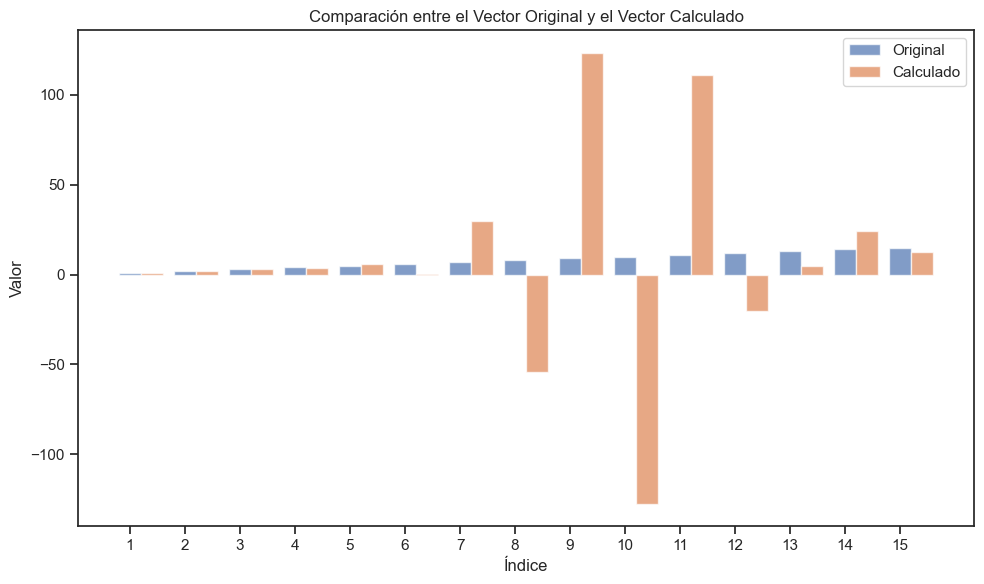

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Vectores originales proporcionados
x_original = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
x_calculado = np.array([1.00000045, 1.99991369, 3.00401786, 3.9199121, 5.85594907, 0.49401463, 
                        29.73435835, -54.29789076, 123.25670894, -127.3475786, 111.03466039, 
                        -20.2858321, 4.80746334, 24.34032254, 12.48397927])

# Crear un gráfico de barras para comparar los valores
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_original)), x_original, width=0.4, label='Original', align='center', alpha=0.7)
plt.bar(np.arange(len(x_calculado)) + 0.4, x_calculado, width=0.4, label='Calculado', align='center', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre el Vector Original y el Vector Calculado')
plt.legend()
plt.xticks(range(len(x_original)), range(1, len(x_original) + 1))
plt.tight_layout()
plt.show()

#### Conclusiones de soluciones alternativas

#### 1.

La solución alternativa 1 es la que da un resultado más preciso, se utilizó np.linalg.solve() de NumPy, la cual demostró una precisión numérica superior en la solución del sistema de ecuaciones lineales Hx=b utilizando la matriz de covarianza Hilbert H y el vector b.

#### 2.
En la solución alternativa 2 se utilizó scipy.linalg.solve(), dando como resultado una buena precisión, sin embargo, sigue siendo superior la alternativa 1 con np.linalg.solve() de NumPy por lo que se evidencia mejor manejo interno de la estabilidad numérica y mayor especialización en operaciones de álgebra lineal. 